In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2 as cv
from PIL import Image
from sklearn.manifold import TSNE
import pylab

In [7]:
filelistTrain = glob.glob('data/*') # Another option is 12Octubre_DB/*
img_rows = 256
img_cols = 256

def load_img(i):

    if '_g_' in filelistTrain[i]:
        label = 1
    elif 'Im' in filelistTrain[i] and not '_g_' in filelistTrain[i]:
        label = 0
    elif not 'Im' in filelistTrain[i]: # this is for unsupervised images. Images with no labels
        label = 2

    #print(self.filelistTrain[i])
    img = Image.open(filelistTrain[i]).convert('RGB')
    img = img.resize([img_rows, img_cols])
    img = np.array(img)
    #img = np.array(cv.normalize(img.astype(np.float32), np.zeros((img_rows, img_cols, 3), dtype=np.float32), -1, 1, cv.NORM_MINMAX))

    return img, label

In [8]:
# load up data
x_data = []
y_data = []
for i in range(len(filelistTrain)):
    x, l = load_img(i)
    x_data.append(x)
    y_data.append(l)

In [9]:
# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

In [10]:
print(x_data.shape)
print(np.array(y_data).sum())

(3597, 196608)
3376


Size of the TSNE result: (3597, 2)


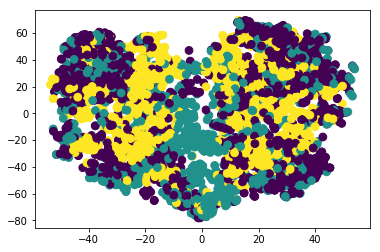

In [11]:
# perform t-SNE embedding
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(x_data)

Size of the TSNE result: (3597, 2)


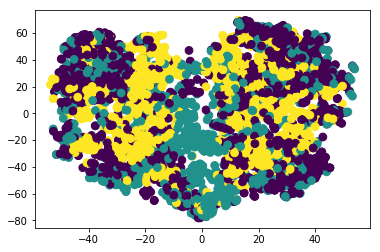

In [16]:
print('Size of the TSNE result: ' + str(tsne_results.shape))
pylab.scatter(tsne_results[:, 0], tsne_results[:, 1], 60, y_data)
pylab.show()

In [ ]:
# THIS RESULT SHOW US THAT IT IS A DIFFICULT TASK. THAT IS WHY USING A PRE-TRAINED CNN AND GETTING SOME FEATURES
# COULD BE A GOOD IDEA. OR USING AN ENCODER TO THEN CLASSIFY THE FEATURES.